# Homework 6 (distributions, statistical error, and scatter plots)

For this homework assignment you are required to use Python (pandas, matplotlib, and seaborn) to do the exercises. Please write your own code and provide your code along with your responses to the questions.

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import numpy as np
import matplotlib.cm as cm

* To get started, load the climate data provided on Canvas
* Data source:  https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data


In [65]:
df_temps = pd.read_csv("DailyDelhiClimateTrain.csv")
df_temps.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


### Problem 1 (1.5 points)

First, create a new column in `df_temps` that contains the name of the month ("January", "February", etc.) of the date for each row. Then visualize the average temperatures recorded in January in two ways:
* Plot a density curve
* Make a scatter plot (plot temperature along the x-axis, and use "jittering" to spread out the dots vertically)

For the jittering, you may create your own randomness (e.g. sample from a uniform distribution), or use a built-in solution (e.g. seaborn stripplot -- https://seaborn.pydata.org/generated/seaborn.stripplot.html )

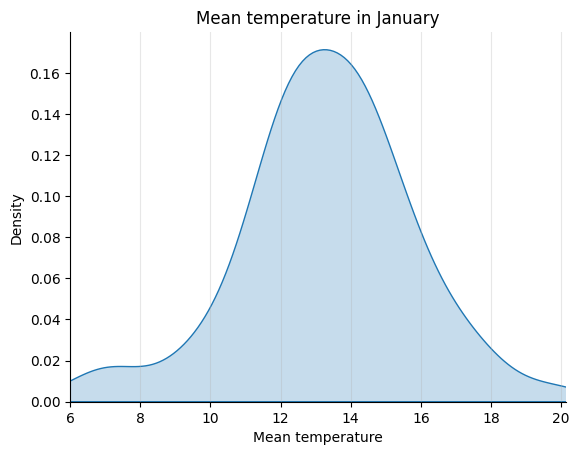

In [125]:
# Your answer here
df_temps["month"] = pd.to_datetime(df_temps.date).apply(lambda x: x.strftime("%B"))
january_data = df_temps[df_temps["month"] == "January"].meantemp

cloud = sns.kdeplot(january_data, fill=True)
cloud.set_title("Mean temperature in January")
cloud.set_xlabel("Mean temperature")
cloud.grid(axis='x', alpha=.3)
cloud.spines[["right","top"]].set_visible(False)
cloud.set_xlim(january_data.min(), january_data.max())
plt.show()

count    125.000000
mean      13.311914
std        2.465232
min        6.000000
25%       12.000000
50%       13.375000
75%       14.714286
max       20.142857
Name: meantemp, dtype: float64


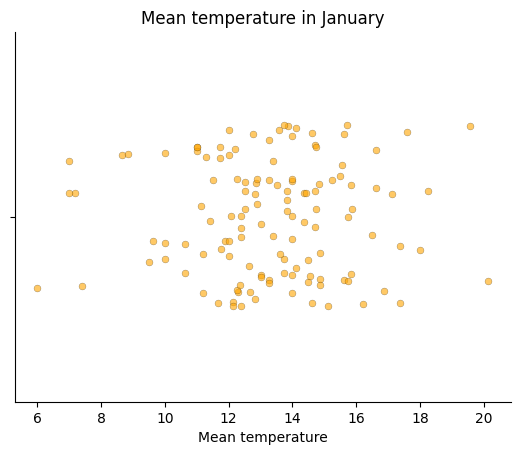

In [124]:
rain = sns.stripplot(
    january_data, orient="h",
    jitter=.25, alpha=.6,
    color='orange', edgecolor="black", linewidth=.2
)
rain.set_title("Mean temperature in January")
rain.set_xlabel("Mean temperature")
rain.spines[["right","top"]].set_visible(False)
plt.show()

### Problem 2 (1.5 points)

**(a)** Now combine these charts together to **make it rain!**
* Plot the density curve, and place the scatter plot underneath
  * Remove excess vertical whitespace between them, if necessary
* Include the shading under the density curve
* Remove all axis lines and units for the moment
* Adjust the `alpha` value on the scatter plot so that there is some transparency between overlapping dots (alpha = 0.7 seems to work well)
* **Be sure to use the same x-axis limits on both charts!**

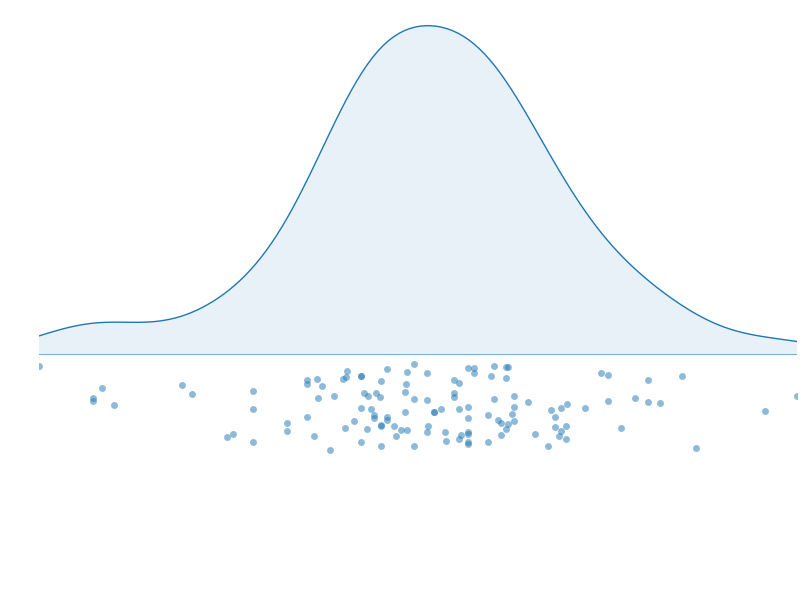

In [165]:
fig, ax = plt.subplots(2, 1,figsize=(8,6))
fig.tight_layout(pad=0)

temp_min, temp_max = january_data.min(), january_data.max()

cloud = sns.kdeplot(january_data, fill=True, ax=ax[0], alpha=.1)
cloud.set_xlim(temp_min, temp_max)
cloud.spines[["top", "left", "right", "bottom"]].set_visible(False)
cloud.set_xlabel(" ")
cloud.set_ylabel(" ")
cloud.set_yticklabels([])
cloud.set_xticklabels([])
cloud.yaxis.set_ticks_position("none")
cloud.xaxis.set_ticks_position("none")

rain = sns.stripplot(january_data, jitter=.125, orient="h", ax=ax[1], alpha=.5)
rain.set_xlim(temp_min, temp_max)
rain.xaxis = cloud.get_xaxis()
rain.spines[["top", "left", "right", "bottom"]].set_visible(False)
ax[1].set_facecolor('none')


plt.tick_params(
    "both",
    which="both",
    left=False,
)

plt.subplots_adjust(hspace=-.35)
plt.show()

**(b)** Now let's do a little more design:
* Use a vertical line to show the mean temperature for January
* Color both charts using `coolwarm` color palette
  * Set 0 as low and 40 as high
  * Use the mean value / 40 as the fraction for the color palette

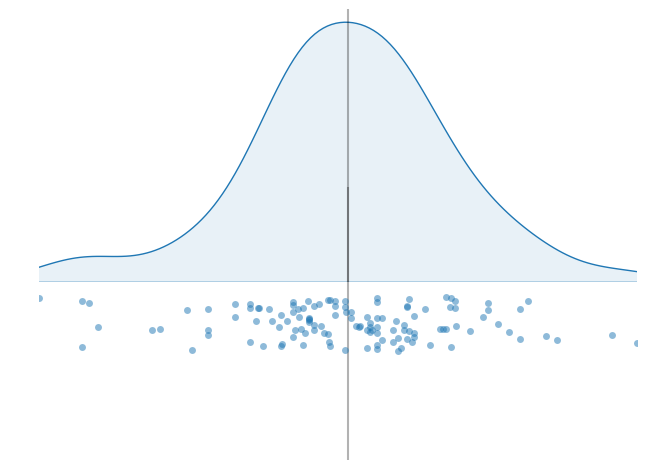

In [168]:
# import matplotlib.cm as cm 
# = cm.get_cmap('coolwarm', len()

fig, ax = plt.subplots(2, 1)
fig.tight_layout(pad=0)

cloud = sns.kdeplot(
    january_data, fill=True, ax=ax[0],
    alpha=.1#, norm=norm
)
cloud.spines[["top", "left", "right", "bottom"]].set_visible(False)
cloud.set_xlim(temp_min, temp_max)
cloud.set_xlabel(" ")
cloud.set_ylabel(" ")
cloud.set_yticklabels([])
cloud.set_xticklabels([])
cloud.yaxis.set_ticks_position("none")
cloud.xaxis.set_ticks_position("none")
cloud.axvline(x=january_data.mean(), color="black", alpha=.3)

rain = sns.stripplot(january_data, jitter=True, orient="h", ax=ax[1], alpha=0.5)#, cmap='coolwarm')
rain.set_xlim(temp_min, temp_max)
rain.xaxis = cloud.get_xaxis()
rain.spines[["top", "left", "right", "bottom"]].set_visible(False)
rain.axvline(x=january_data.mean(), color="black", alpha=.3)
ax[1].set_facecolor('none')

plt.tick_params(
    "both",
    which="both",
    left=False,
)

plt.subplots_adjust(hspace=-.35)
plt.show()

**Note**:
* https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html uses proportions for its boundary values (0 is min, 1 is max)
* https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.vlines.html#matplotlib.axes.Axes.vlines uses data coordinates



### Problem 3 (4 points)

Use the previous problem to show temperature averages across all months:
* Create 12 raincloud charts, 1 per month, and stack them vertically
* Use the same low and high temperature on each chart (ranges from about 3 to about 42)
* Use the same y-axis values on each density curve
* Color each individual month according to the `coolwarm` color palette
  * Use the mean temperature value for each month
  * Compute the range of average temperatures to use as your interval (lowest average should map to about 0, and highest average should map to about 1)
* Include the mean temperature line on each density curve

Additional design elements:
* Get rid of any extraneous legends, axis lines, box lines (spines), etc.
* Plot a grid line at 0 for each density curve
* Label the months on each chart
* Get rid of excess vertical whitespace
* Show units on x-axis once at the bottom of the figure
* Create a figure title

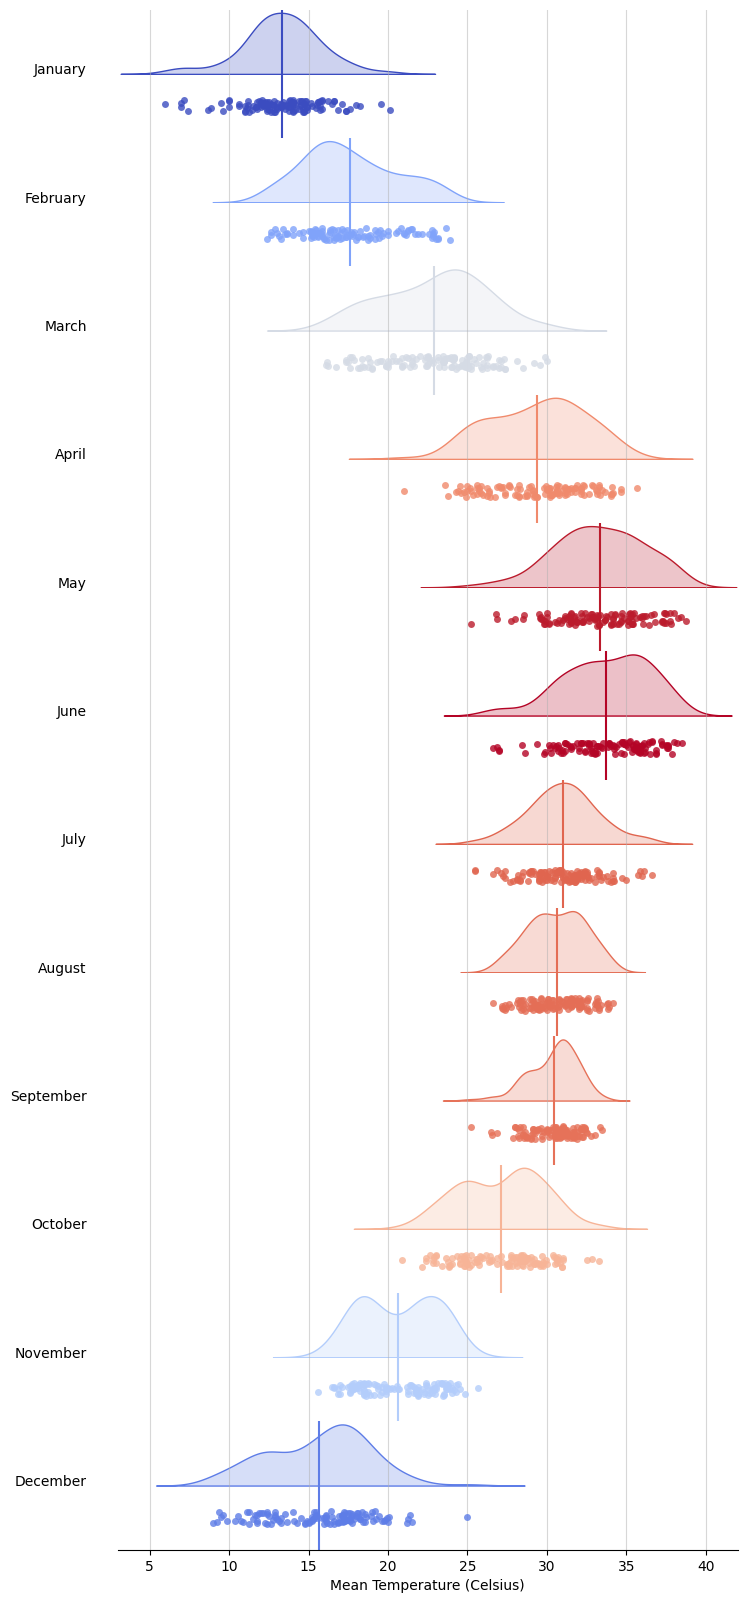

In [175]:
#= cm.get_cmap('coolwarm', len(M))

data_per_month: dict[str, pd.DataFrame] = {}
MONTHS: tuple[str] = (
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
)
year_min, year_max = df_temps.meantemp.min(), df_temps.meantemp.max()
temp_min, temp_max = 3, 42

fig, ax = plt.subplots(24, 1,figsize=(8,20))
monthly_means = df_temps.groupby('month').meantemp.mean()
month_mean_min, month_mean_max = monthly_means.min(), monthly_means.max()

for i, month in enumerate(MONTHS):
    cloud, rain = ax[i*2], ax[i*2+1]
    fraction = (monthly_means.loc[month] - month_mean_min)/(month_mean_max - month_mean_min)
    color = plt.cm.coolwarm(fraction)

    
    sns.kdeplot(
        month_data:=df_temps[df_temps.month == month].meantemp, ax=cloud,
       label=month, fill=True, color=color
    )
    cloud.spines[["top", "bottom", "left", "right"]].set_visible(False)
    cloud.set_xlabel(" ")
    cloud.set_ylabel(" ")
    cloud.set_xticklabels([])
    cloud.set_yticklabels([])
    cloud.yaxis.set_ticks_position("none")
    cloud.xaxis.set_ticks_position("none")
    cloud.set_facecolor("none")
    cloud.set_xlim(temp_min, temp_max)
    cloud.axvline(monthly_means[month], color=color)
    cloud.text(1.05, 0, month, ha="right")
    cloud.grid(axis='x', alpha=.5)

    index += 1
    sns.stripplot(month_data, ax=rain, alpha=.8, color=color, orient='h')
    if i < 11:
        rain.set_xlabel(" ")
        rain.set_xticklabels([])
        rain.xaxis.set_ticks_position("none")
        rain.spines[["top", "bottom", "left", "right"]].set_visible(False)
    else:
        rain.set_xlabel("Mean Temperature (Celsius)")
        rain.spines[["top", "left", "right"]].set_visible(False)
    rain.set_ylabel(" ")
    rain.set_yticklabels([])
    rain.yaxis.set_ticks_position("none")
    rain.set_facecolor("none")
    rain.set_xlim(temp_min, temp_max)
    rain.axvline(monthly_means[month], color=color)
    rain.grid(axis='x', alpha=.5)
    #print(rain.get_xlim(), rain.get_ylim())

plt.subplots_adjust(hspace=0)
plt.show()


### Problem 4 (3 points)

Let's go back to the original data frame:

In [ ]:
df_temps.head()

**(a)** Create a scatter plot to plot `meantemp` against `humidity`. Include a line of best fit:
*  https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

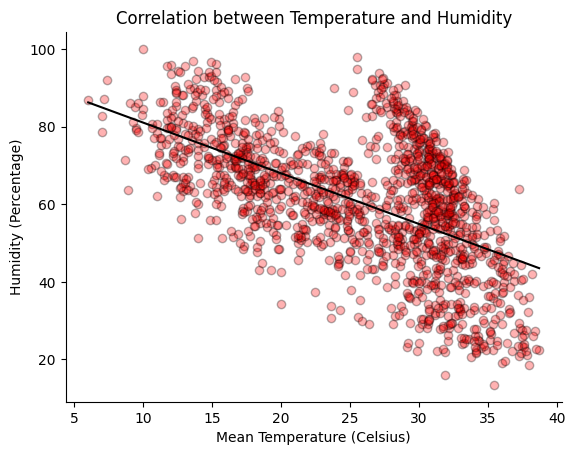

In [38]:
temps, humidity = df_temps.meantemp, df_temps.humidity
slope, intercept = np.polyfit(temps, humidity, 1)
xfit = np.linspace(temps.min(),temps.max(),100)
yfit = slope * xfit + intercept

fig, ax = plt.subplots()
ax.scatter(x=temps, y=humidity, alpha=.3, edgecolor='k', facecolor="red")
ax.plot(xfit, yfit, color="black")
ax.set_xlabel("Mean Temperature (Celsius)")
ax.set_ylabel("Humidity (Percentage)")
ax.set_title("Correlation between Temperature and Humidity")
ax.spines[["right","top"]].set_visible(False)

plt.show()

**(b)** Update the scatter plot by coloring dots by season:
* Use December, January, February as winter
* Use March, April, May as spring
* Use June, July, August as summer
* Use September, October, November as fall


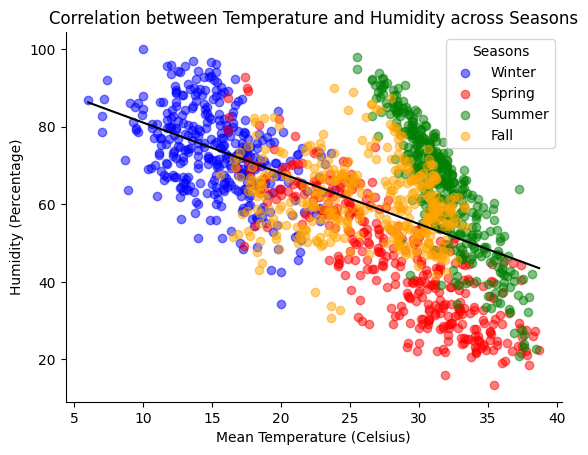

In [39]:
def get_season(entry):
    if entry.month in ("December", "January", "February"):
        return "Winter"
    elif entry.month in ("March", "April", "May"):
        return "Spring"
    elif entry.month in ("June", "July", "August"):
        return "Summer"
    else:
        return "Fall"

df_temps['season'] = df_temps.apply(get_season, axis=1)

colors = {"Winter": "blue",
          "Spring": "red",
          "Summer": "green",
          "Fall": "orange"}

fig, ax = plt.subplots()
for season in colors:
    season_data = df_temps[df_temps['season'] == season]
    ax.scatter(season_data.meantemp, season_data.humidity,
               color=colors[season], alpha=0.5, label=season)

temps, humidity = df_temps.meantemp, df_temps.humidity
slope, intercept = np.polyfit(temps, humidity, 1)
xfit = np.linspace(temps.min(),temps.max(),100)
yfit = slope * xfit + intercept
ax.plot(xfit, yfit, color="black")

ax.legend(title="Seasons")
ax.set_xlabel("Mean Temperature (Celsius)")
ax.set_ylabel("Humidity (Percentage)")
ax.set_title("Correlation between Temperature and Humidity across Seasons")
ax.spines[["right","top"]].set_visible(False)

plt.show()

**(c)** Finally, split the scatter plot into 4 individual charts:
* Use a 2x2 grid, with one chart per season
* Label the season for each individual chart
* Use the same x and y coordinate ranges on each chart
* Include an individual line of best fit for each chart


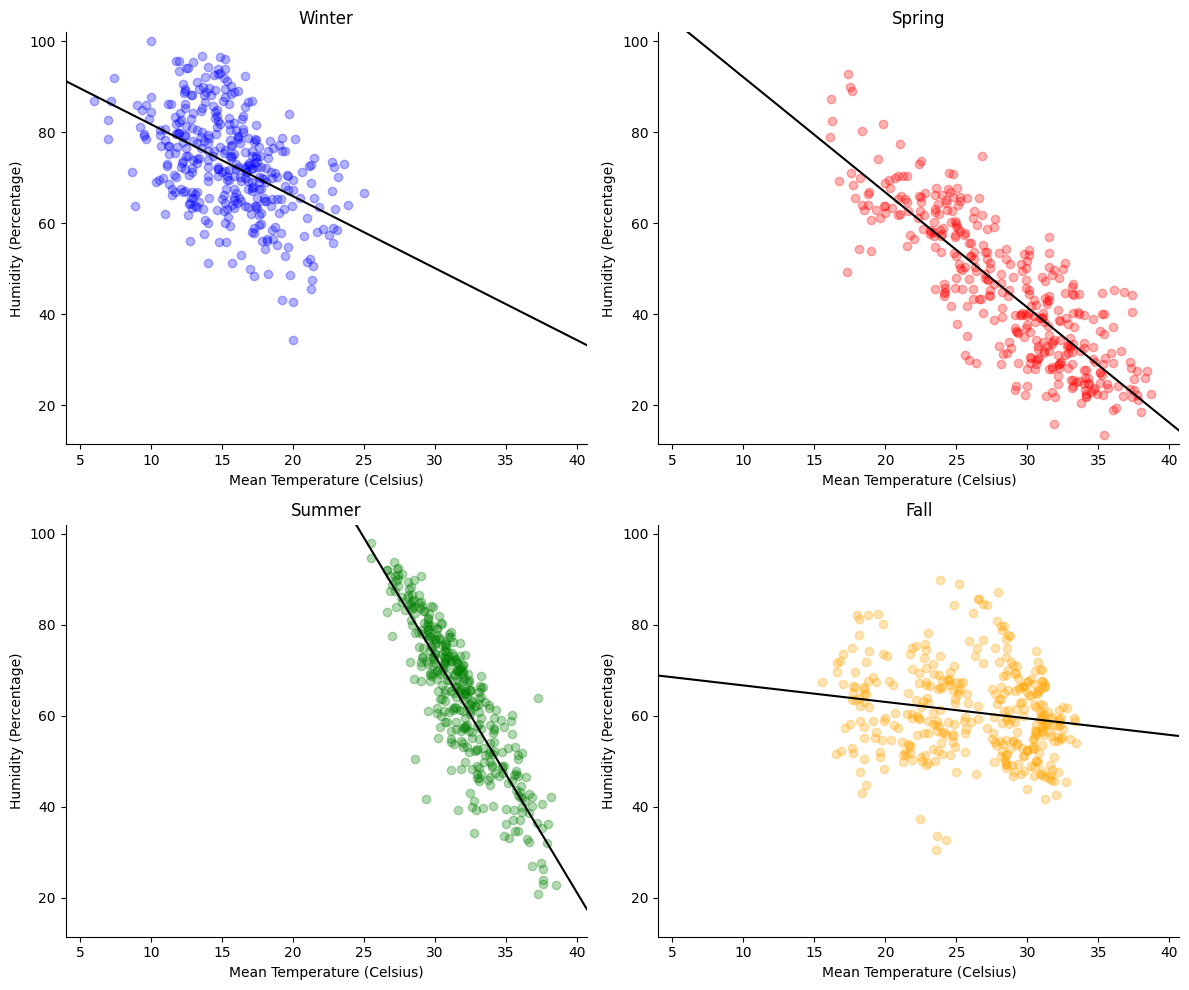

In [161]:
def get_season(entry):
    if entry.month in ("December", "January", "February"):
        return "Winter"
    elif entry.month in ("March", "April", "May"):
        return "Spring"
    elif entry.month in ("June", "July", "August"):
        return "Summer"
    else:
        return "Fall"

df_temps['season'] = df_temps.apply(get_season, axis=1)
temp_min, temp_max = df_temps.meantemp.min()-2, df_temps.meantemp.max()+2
humid_min, humid_max = df_temps.humidity.min()-2, df_temps.humidity.max()+2

colors = [{"Winter": "blue",
          "Spring": "red"},
          {"Summer": "green",
          "Fall": "orange"}]

fig, ax = plt.subplots(2,2, figsize=(12,10))
for row, seasons in zip(ax, colors):
    for axes, season in zip(row,seasons):
        season_data = df_temps[df_temps['season'] == season]
        axes.scatter(
            season_data.meantemp, season_data.humidity,
            alpha=.3, color=seasons[season], label=season
        )
        axes.set_xlim(temp_min,temp_max)
        axes.set_ylim(humid_min,humid_max)
        axes.set_title(season)
        axes.set_ylabel("Humidity (Percentage)")
        axes.set_xlabel("Mean Temperature (Celsius)")
        axes.spines[["right","top"]].set_visible(False)
    
        slope, intercept = np.polyfit(season_data.meantemp, season_data.humidity, 1)
        xfit = np.linspace(temp_min, temp_max, 100)
        yfit = slope * xfit + intercept
        axes.plot(xfit, yfit, color="black")

plt.tight_layout()
plt.show()